# 제주 신용카드 빅데이터 경진대회

## Preprocessing

### 관광객 데이터 수치형에서 범주형으로 만들기

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_name = fm.FontProperties(fname=font_path, size=50).get_name()
plt.rc('font', family=font_name)

%matplotlib inline

In [49]:
df = pd.read_csv('/Users/kimchaehyeong/Documents/DACON/7월/final_merge.csv', encoding='EUC-KR', index_col='Unnamed: 0')
df

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,month,...,confirmed,released,deceased,YYMM,festival_count,rain_day,sex_age_population,screen_num,total_tourist,total_sale_by_indst
1,강원,건강보조식품 소매업,강원,20s,1,1,13,843100.0,16,11,...,0,0,0,2019-11-01,0,9.1,100115,28,1.808904e+06,33849.0
2,강원,건강보조식품 소매업,강원,20s,1,1,3,139000.0,3,6,...,0,0,0,2019-06-01,8,10.6,100115,28,1.374767e+06,33849.0
3,강원,건강보조식품 소매업,강원,20s,1,1,3,27500.0,3,8,...,0,0,0,2019-08-01,8,13.9,100115,28,1.603895e+06,33849.0
4,강원,건강보조식품 소매업,강원,20s,1,1,3,395500.0,3,9,...,0,0,0,2019-09-01,11,9.8,100115,28,2.062151e+06,33849.0
5,강원,건강보조식품 소매업,강원,20s,1,1,3,427510.0,2,3,...,29,23,1,2020-03-01,0,7.3,100115,28,NaN,33849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057390,충북,휴양콘도 운영업,충북,70s,2,5,3,230400.0,3,1,...,0,0,0,2020-01-01,0,6.9,65436,19,NaN,50447.0
1057391,충북,휴양콘도 운영업,충북,70s,2,5,3,247800.0,3,12,...,0,0,0,2019-12-01,0,9.1,65436,19,1.567717e+05,50447.0
1057392,충북,휴양콘도 운영업,충북,70s,2,5,3,83000.0,3,2,...,0,0,0,2019-02-01,0,6.3,65436,19,1.326530e+05,50447.0
1057393,충북,휴양콘도 운영업,충북,70s,2,5,5,329800.0,7,5,...,0,0,0,2019-05-01,0,7.3,65436,19,1.447123e+05,50447.0


In [50]:
df['total_tourist'].nunique()

122

In [51]:
df['total_tourist'].unique()

array([ 1808903.94870833,  1374767.00101833,  1603894.83452138,
        2062150.50152749,               nan,  2146566.01913388,
        2086269.2208436 ,  1845082.02768249,  1423004.43965055,
        2291278.33503055,  1386826.36067638,  2435990.65092721,
        2785712.08101082,  3014839.91451388,  2725415.28272055,
        2966602.47588166,  2556584.24750777,  2906305.67759138,
        3581629.81844249,  2942483.75656555,  3376620.70425554,
        3424858.14288777,  3038958.63382999,  3485154.94117804,
         482374.38632222,   265305.91247722,   434136.94769   ,
         361780.78974167,   397958.86871583,   373840.14939972,
         313543.35110944,   422077.58803194,   518552.46529639,
         687383.50050916,   615027.34256083,   554730.54427055,
         385899.50905778,   506493.10563833,   711502.21982528,
         639146.06187694,   675324.14085111,   530611.82495444,
         217068.473845  ,   277365.27213528,   168831.03521278,
         192949.75452889,   253246.55281

In [52]:
df['total_tourist_qcut'] = pd.qcut(df.total_tourist, q=5, labels=[1,2,3,4,5])
df.total_tourist_qcut.value_counts().to_frame()

,total_tourist_qcut
2,184804
4,179623
1,177724
5,173013
3,167463


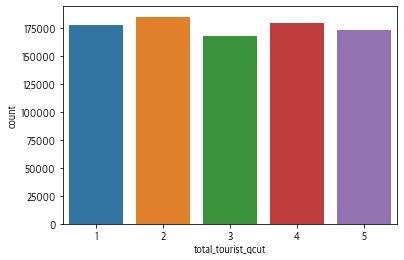

In [53]:
sns.countplot(data=df, x='total_tourist_qcut')

In [54]:
df[['total_tourist', 'total_tourist_qcut']]

,total_tourist,total_tourist_qcut
1,1.808904e+06,4
2,1.374767e+06,4
3,1.603895e+06,4
4,2.062151e+06,4
5,NaN,NaN
...,...,...
1057390,NaN,NaN
1057391,1.567717e+05,1
1057392,1.326530e+05,1
1057393,1.447123e+05,1


In [55]:
groupbymean = df.groupby(['total_tourist_qcut'], as_index=False).mean()['total_tourist']

In [56]:
df['total_tourist_groupby'] = df['total_tourist']
df.loc[df.total_tourist_qcut== 1,'total_tourist_groupby'] = groupbymean[0]
df.loc[df.total_tourist_qcut== 2,'total_tourist_groupby'] = groupbymean[1]
df.loc[df.total_tourist_qcut== 3,'total_tourist_groupby'] = groupbymean[2]
df.loc[df.total_tourist_qcut== 4,'total_tourist_groupby'] = groupbymean[3]
df.loc[df.total_tourist_qcut== 5,'total_tourist_groupby'] = groupbymean[4]
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,month,...,deceased,YYMM,festival_count,rain_day,sex_age_population,screen_num,total_tourist,total_sale_by_indst,total_tourist_qcut,total_tourist_groupby
1,강원,건강보조식품 소매업,강원,20s,1,1,13,843100.0,16,11,...,0,2019-11-01,0,9.1,100115,28,1.808904e+06,33849.0,4,1.980289e+06
2,강원,건강보조식품 소매업,강원,20s,1,1,3,139000.0,3,6,...,0,2019-06-01,8,10.6,100115,28,1.374767e+06,33849.0,4,1.980289e+06
3,강원,건강보조식품 소매업,강원,20s,1,1,3,27500.0,3,8,...,0,2019-08-01,8,13.9,100115,28,1.603895e+06,33849.0,4,1.980289e+06
4,강원,건강보조식품 소매업,강원,20s,1,1,3,395500.0,3,9,...,0,2019-09-01,11,9.8,100115,28,2.062151e+06,33849.0,4,1.980289e+06
5,강원,건강보조식품 소매업,강원,20s,1,1,3,427510.0,2,3,...,1,2020-03-01,0,7.3,100115,28,NaN,33849.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057390,충북,휴양콘도 운영업,충북,70s,2,5,3,230400.0,3,1,...,0,2020-01-01,0,6.9,65436,19,NaN,50447.0,NaN,NaN
1057391,충북,휴양콘도 운영업,충북,70s,2,5,3,247800.0,3,12,...,0,2019-12-01,0,9.1,65436,19,1.567717e+05,50447.0,1,1.433245e+05
1057392,충북,휴양콘도 운영업,충북,70s,2,5,3,83000.0,3,2,...,0,2019-02-01,0,6.3,65436,19,1.326530e+05,50447.0,1,1.433245e+05
1057393,충북,휴양콘도 운영업,충북,70s,2,5,5,329800.0,7,5,...,0,2019-05-01,0,7.3,65436,19,1.447123e+05,50447.0,1,1.433245e+05


In [57]:
df_pre = df[['total_tourist', 'total_tourist_groupby']]
df_pre

,total_tourist,total_tourist_groupby
1,1.808904e+06,1.980289e+06
2,1.374767e+06,1.980289e+06
3,1.603895e+06,1.980289e+06
4,2.062151e+06,1.980289e+06
5,NaN,NaN
...,...,...
1057390,NaN,NaN
1057391,1.567717e+05,1.433245e+05
1057392,1.326530e+05,1.433245e+05
1057393,1.447123e+05,1.433245e+05


In [58]:
df_pre.to_csv('total_tourist_groupby.csv')